How's it look?

Now with **Mixture model**!

We have orders m111, m113, m114, m115 complete.  Let's plot all of the results on the same figure.

In [1]:
ws = np.load("../sf/m115/output/mix_emcee/run01/emcee_chain.npy")

In [2]:
from matplotlib.ticker import MaxNLocator

In [3]:
label = ["$T_{\mathrm{eff}}$", "$\log{g}$", "$[\mathrm{Fe}/\mathrm{H}]$","$v_z$", "$v\sin{i}$", "$\log{\Omega}$", 
         "$T_{\mathrm{eff,2}}$", "$\log{\Omega_2}$", "$c^1$", "$c^2$", "$c^3$", "sigAmp", "logAmp", "$l$"] 

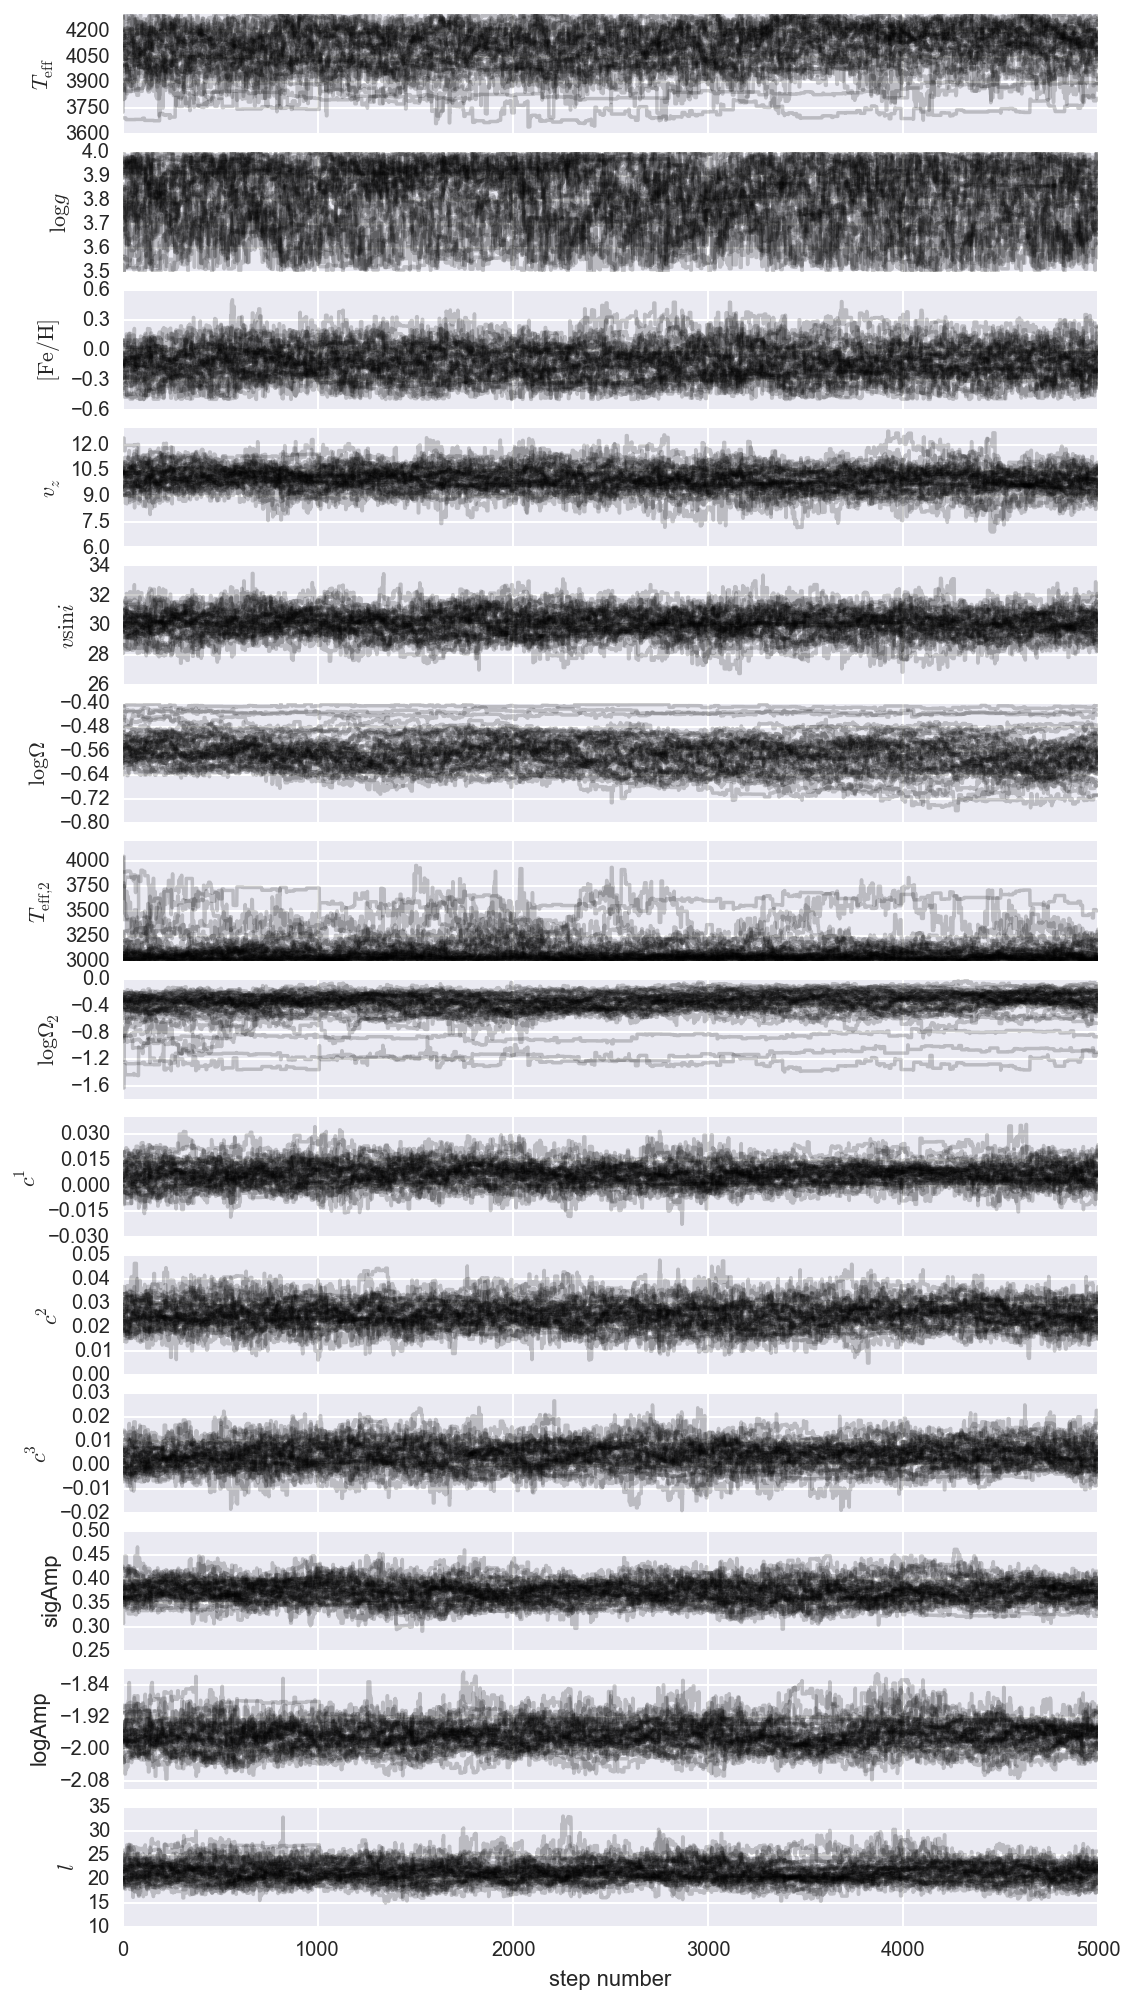

In [4]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")

fig.tight_layout(h_pad=0.0)
fig.savefig("ensemble_walkers.png")

In [5]:
burned = ws[:, 4000:,:]

xs, ys, zs = burned.shape

fc = burned.reshape(xs*ys, zs)

nx, ny = fc.shape

In [9]:
fc.shape

(40000, 14)

In [ ]:
import corner
fig = corner.corner(fc, labels=label)
fig.savefig('twelve_parameter_corner.png', dpi=300)

So cool, it looks like it's working, but it's displaying $\log{\Omega_2}$ instead of the fill factor.  Let's **compute** the fill factor, $b$, by:  
$ b = \frac{\Omega_2}{\Omega_1 + \Omega_2}$

In [10]:
fc.shape

(40000, 14)

In [11]:
bb = 10**fc[:,7] / ( 10**fc[:,5] + 10**fc[:,7] )

The other parameter we care about is the temperature of the cool spot, $T_{\mathrm{eff,2}}$.

In [12]:
tt = fc[:,6]

In [13]:
sns.set_context('talk')

In [14]:
sns.set_style('ticks')

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


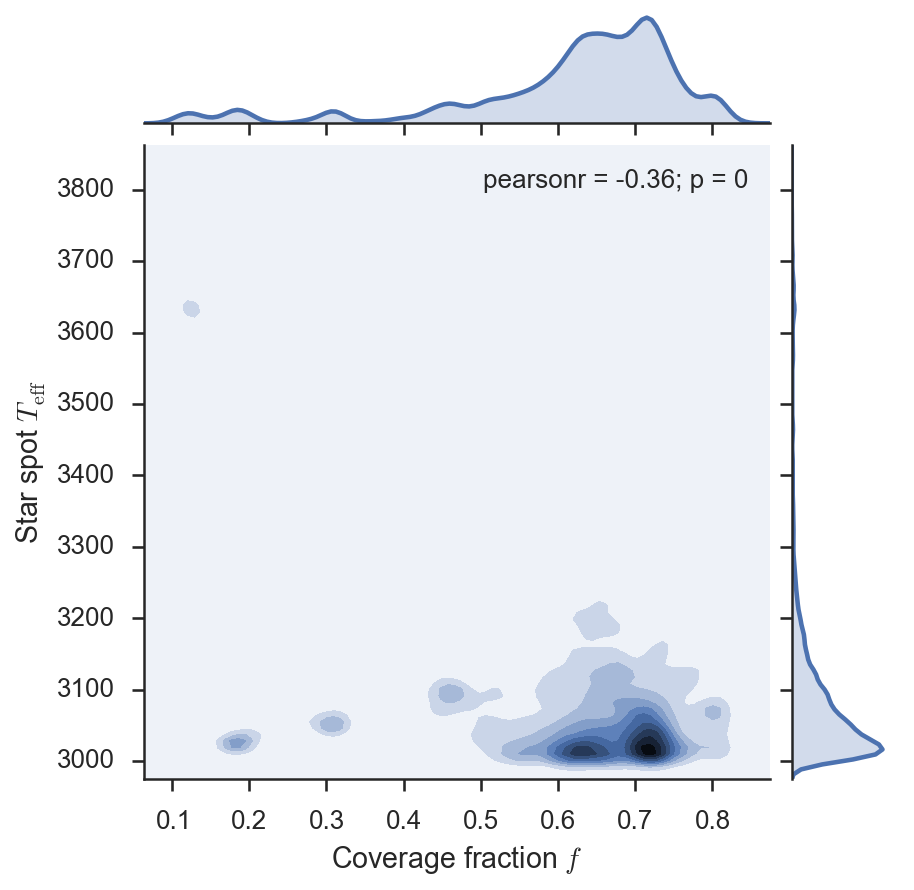

In [15]:
ax = sns.jointplot(bb, tt, kind='kde')
ax.ax_joint.set_ylabel('Star spot $T_{\mathrm{eff}}$')
ax.ax_joint.set_xlabel('Coverage fraction $f$')
plt.savefig('Star_spot_measurement.pdf', bbox_inches='tight')

# Over-plot many measurements from different orders.

In [50]:
ws115 = np.load("../sf/m115/output/mix_emcee/run01/emcee_chain.npy")
ws114 = np.load("../sf/m114/output/mix_emcee/run01/emcee_chain.npy")
ws113 = np.load("../sf/m113/output/mix_emcee/run01/emcee_chain.npy")
ws112 = np.load("../sf/m112/output/mix_emcee/run01/emcee_chain.npy")

In [51]:
b115 = ws115[:, 4000:,:]
xs, ys, zs = b115.shape
fc115 = b115.reshape(xs*ys, zs)

b114 = ws114[:, 4000:,:]
xs, ys, zs = b114.shape
fc114 = b114.reshape(xs*ys, zs)

b113 = ws113[:, 4000:,:]
xs, ys, zs = b113.shape
fc113 = b113.reshape(xs*ys, zs)

b112 = ws112[:, 4000:,:]
xs, ys, zs = b112.shape
fc112 = b112.reshape(xs*ys, zs)

In [52]:
bb115 = 10**fc115[:,7] / ( 10**fc115[:,5] + 10**fc115[:,7] )
bb114 = 10**fc114[:,7] / ( 10**fc114[:,5] + 10**fc114[:,7] )
bb113 = 10**fc113[:,7] / ( 10**fc113[:,5] + 10**fc113[:,7] )
bb112 = 10**fc112[:,7] / ( 10**fc112[:,5] + 10**fc112[:,7] )

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


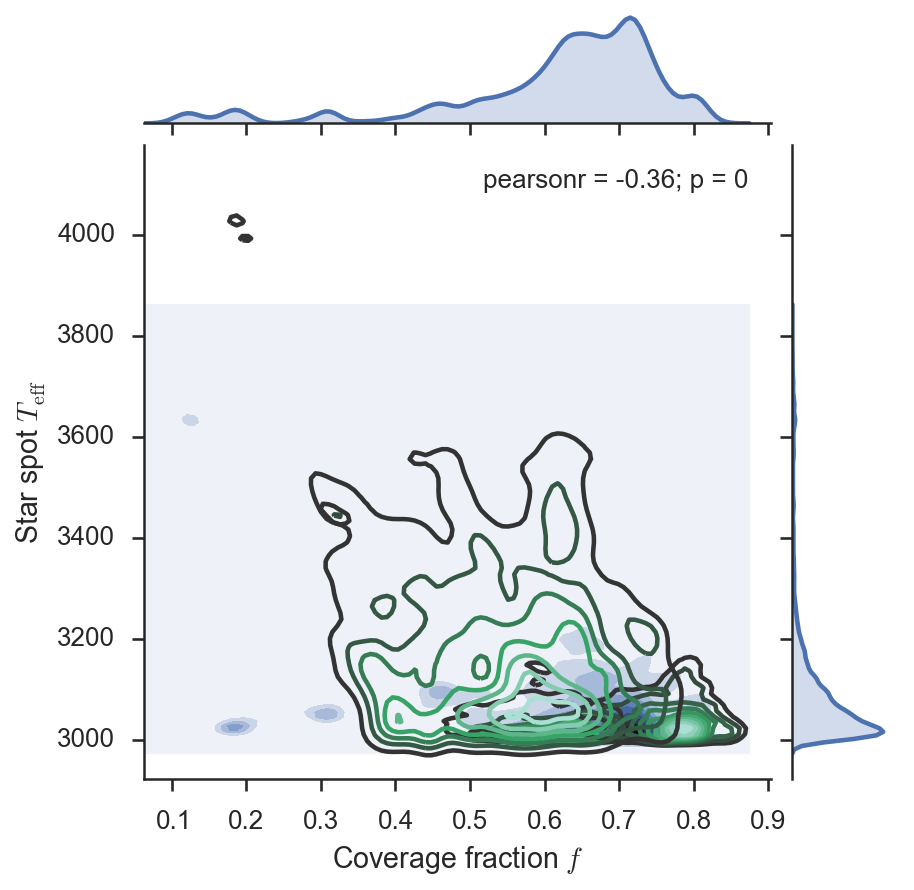

In [53]:
ax = sns.jointplot(bb115, fc115[:,6], kind='kde')
ax.ax_joint.set_ylabel('Star spot $T_{\mathrm{eff}}$')
ax.ax_joint.set_xlabel('Coverage fraction $f$')
sns.kdeplot(bb114,  fc114[:,6], ax=ax.ax_joint)
sns.kdeplot(bb113,  fc113[:,6], ax=ax.ax_joint)
sns.kdeplot(bb112,  fc112[:,6], ax=ax.ax_joint)
plt.savefig('Star_spot_measurement.pdf', bbox_inches='tight')

Whaaat?  The estimates actually agree (sort of)??  My first reaction is that lower Teff2 starspot spectra just add more variance to the fit, since cooler star spectra have more wiggles...  I dunno though, could be "real"!

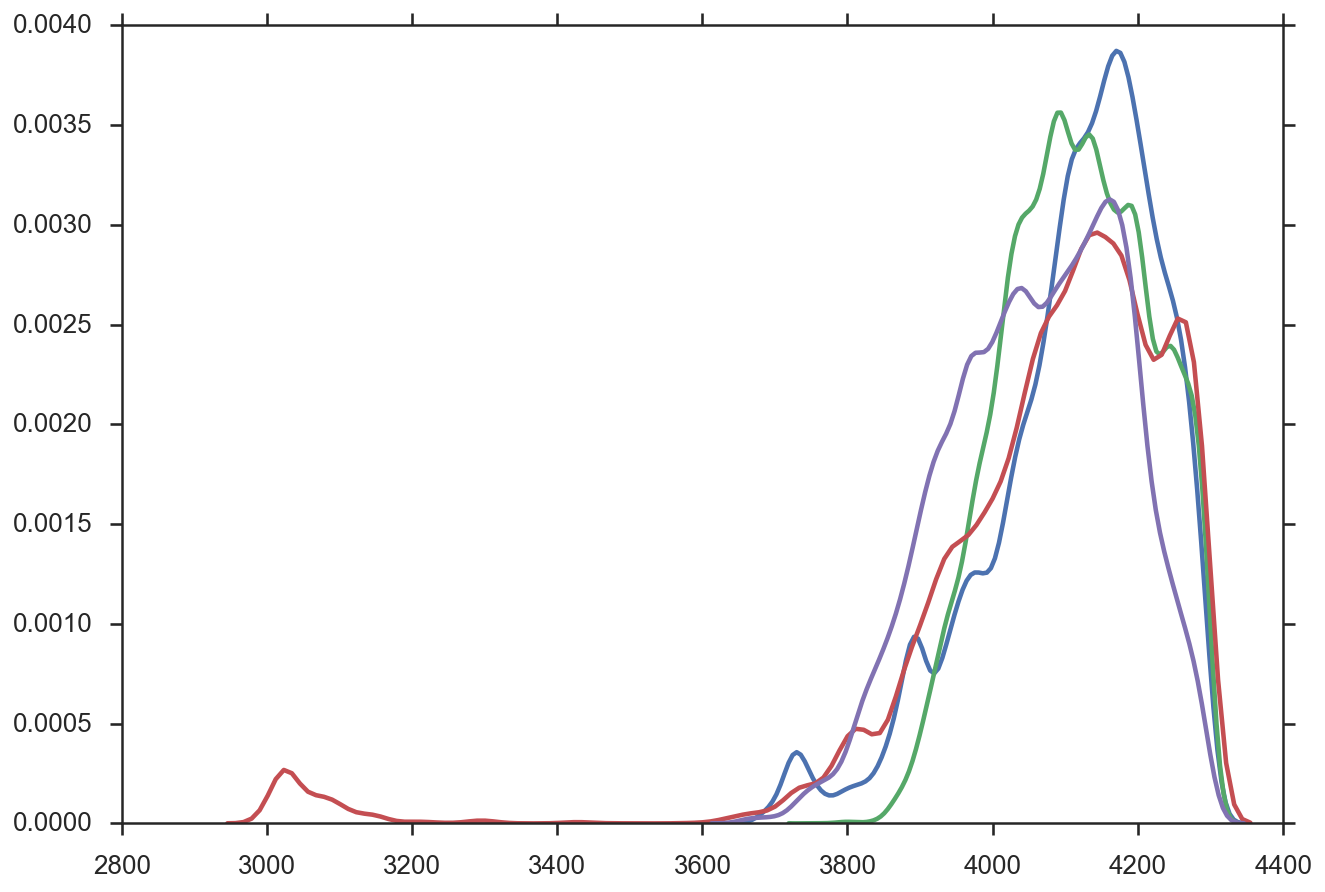

In [33]:
sns.distplot(fc115[:,0], hist=False);
sns.distplot(fc114[:,0], hist=False);
sns.distplot(fc113[:,0], hist=False);
sns.distplot(fc112[:,0], hist=False);

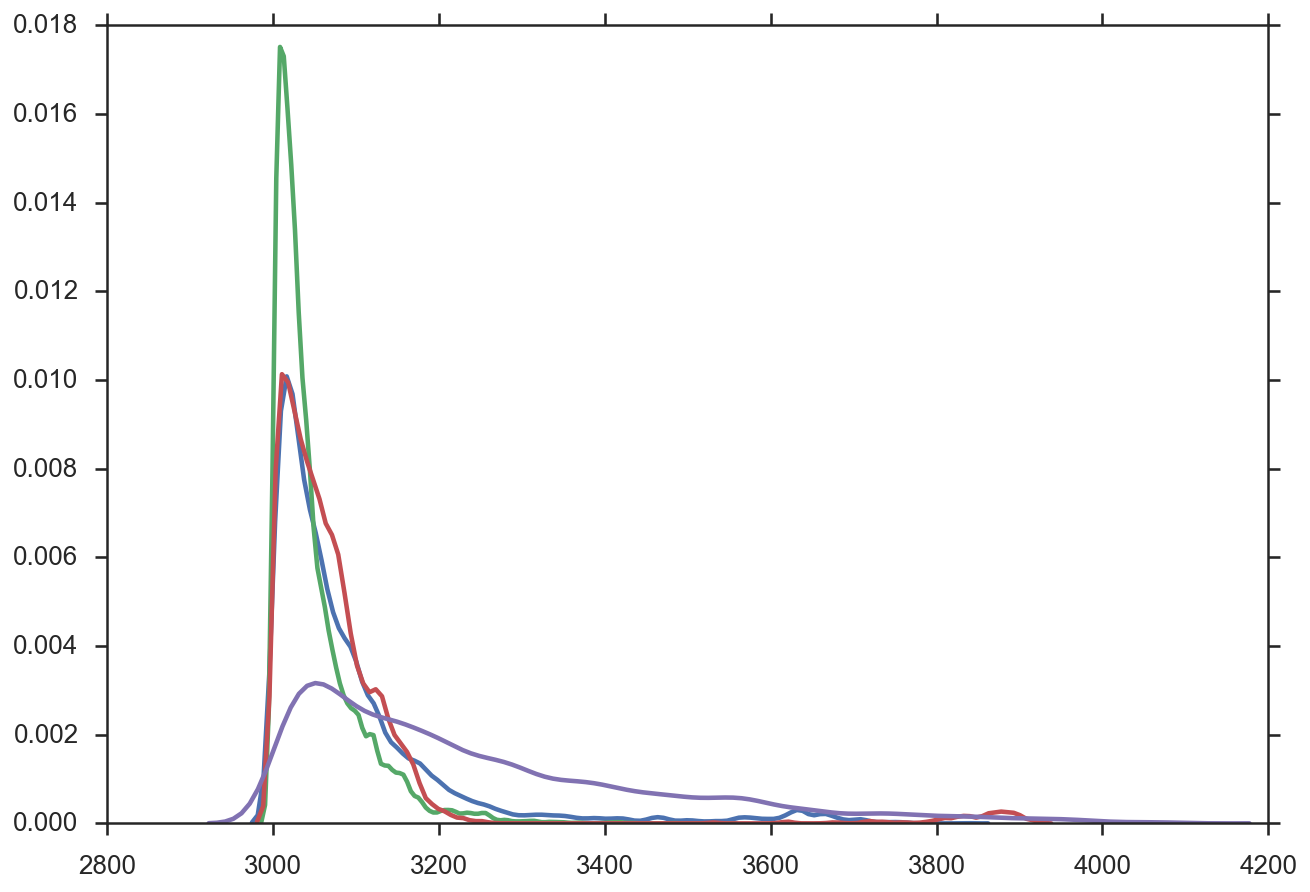

In [48]:
i=6
sns.distplot(fc115[:,i], hist=False);
sns.distplot(fc114[:,i], hist=False);
sns.distplot(fc113[:,i], hist=False);
sns.distplot(fc112[:,i], hist=False);

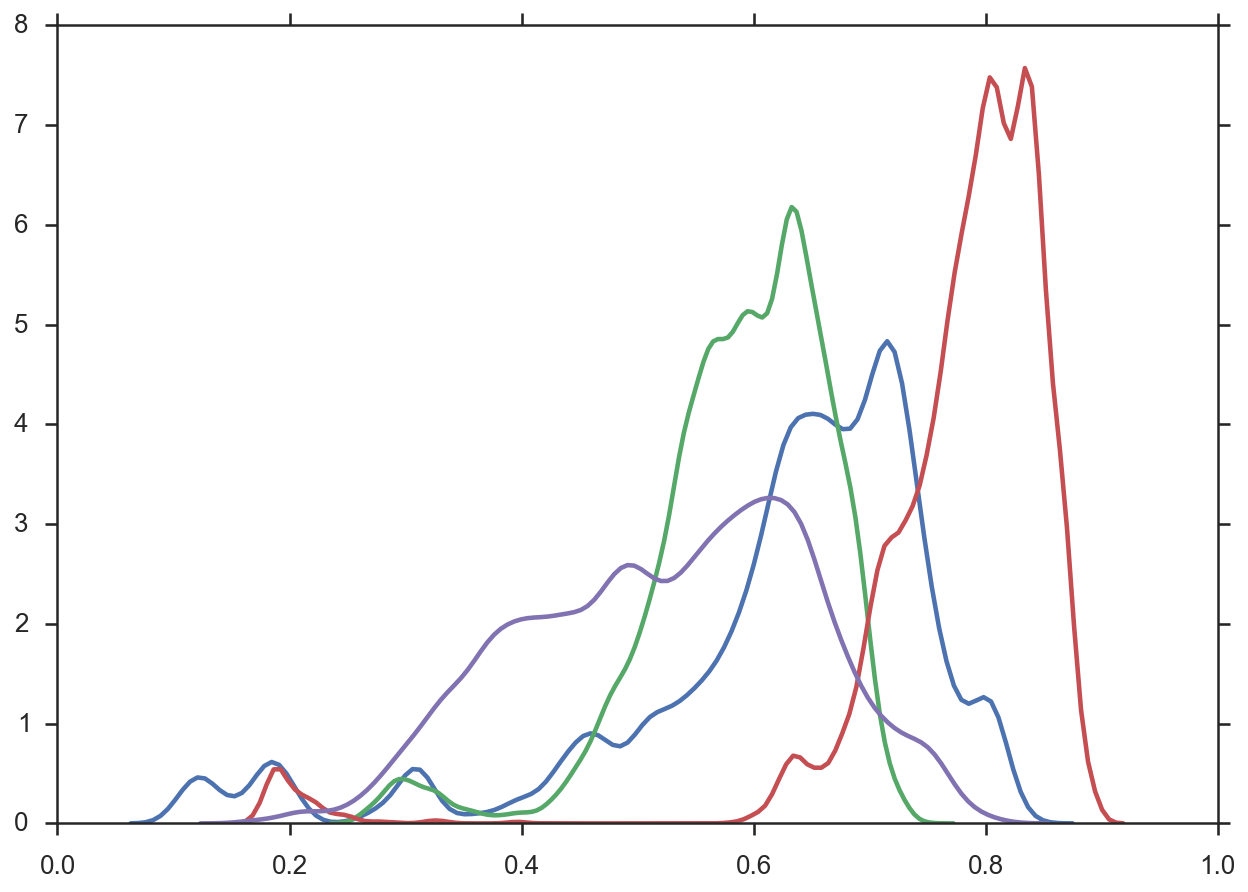

In [49]:
sns.distplot(bb115, hist=False);
sns.distplot(bb114, hist=False);
sns.distplot(bb113, hist=False);
sns.distplot(bb112, hist=False);

In [23]:
vals = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), 
           zip(*np.percentile(fc, [16, 50, 84], axis=0)))

In [24]:
vs = list(vals)

In [25]:
for lab, v in zip(label, vs):
    print("{}: {:.4f}".format(lab, v[0]))

$T_{\mathrm{eff}}$: 4113.3890
$\log{g}$: 3.8028
$[\mathrm{Fe}/\mathrm{H}]$: 0.0966
$v_z$: 11.5673
$v\sin{i}$: 28.2112
$\log{\Omega}$: -0.7067
$T_{\mathrm{eff,2}}$: 3053.0416
$\log{\Omega_2}$: -0.1095
$c^1$: 0.0130
$c^2$: -0.0487
$c^3$: 0.0008
sigAmp: 0.3056
logAmp: -1.8757
$l$: 22.8488


## But what does the *range* of best fit spectra look like?

Ways to demonstrate:
    - Animation
    - Fill between color bands
    - Animation for one parameter variation at a time

The end.